<a href="https://colab.research.google.com/github/SVJLucas/ApprAuto2023/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!!pip install feature-engine

['Collecting feature-engine',
 '  Downloading feature_engine-1.6.2-py2.py3-none-any.whl (328 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/328.9 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b112.6/328.9 kB\x1b \x1b3.2 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b328.9/328.9 kB\x1b \x1b5.2 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hRequirement already satisfied: numpy>=1.18.2 in /usr/local/lib/python3.10/dist-packages (from feature-engine) (1.23.5)',
 'Requirement already satisfied: pandas>=1.0.3 in /usr/local/lib/python3.10/dist-packages (from feature-engine) (1.5.3)',
 'Requirement already satisfied: scikit-learn>=1.0.0 in /usr/local/lib/python3.10/dist-packages (from feature-engine) (1.2.2)',
 'Requirement already satisfied: scipy>=1.4.1 in /usr/local/lib/python3.10/dist-packages (from feature-engine) (1.11.3)',
 'Requirement

In [ ]:
import numpy as np
import  pandas as pd
import  seaborn as sns
import  scipy.stats as stats
import  matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
target_variable_names = ['year',
       'commentaires_retard_arrivee', 'commentaires_retard_arrivee_lag1',
       'commentaire_annulation', 'commentaire_annulation_lag1',
       'commentaire_retards_depart', 'commentaire_retards_depart_lag1',
       'nb_train_retard_sup_15', 'nb_train_retard_sup_30',
       'nb_train_retard_sup_60', 'prct_cause_externe', 'prct_cause_infra',
       'prct_cause_gestion_trafic', 'prct_cause_materiel_roulant', 'retard_moyen_tous_trains_arrivee',
       'prct_cause_gestion_gare', 'prct_cause_prise_en_charge_voyageurs']

In [ ]:
target = ['prct_cause_externe',
          'prct_cause_infra',
          'prct_cause_gestion_trafic',
          'prct_cause_materiel_roulant',
          'prct_cause_gestion_gare',
          'prct_cause_prise_en_charge_voyageurs']

In [ ]:
nn_features = ['month', 'service', 'nb_train_prevu', 'duree_moyenne_lag1','gare_depart', 'gare_arrivee',
       'retard_moyen_tous_trains_depart_lag1',
       'nb_train_retard_arrivee_lag1',
       'retard_moyen_tous_trains_arrivee_lag1',
       'nb_train_retard_arrivee', 'nb_annulation',
       'retard_moyen_tous_trains_depart', 'retard_moyen_arrivee',
       'duree_moyenne', 'prct_cause_externe_lag1',
          'prct_cause_infra_lag1',
          'prct_cause_gestion_trafic_lag1',
          'prct_cause_materiel_roulant_lag1',
          'prct_cause_gestion_gare_lag1',
          'prct_cause_prise_en_charge_voyageurs_lag1']

In [ ]:
X_train=pd.read_csv('/content/drive/MyDrive/ML-3A/Data/train.csv')
y_train=X_train[target]
X_train = X_train.drop(columns=target_variable_names)
X_train = X_train[nn_features]

X_valid=pd.read_csv('/content/drive/MyDrive/ML-3A/Data/validation.csv')
y_valid=X_valid[target]
X_valid = X_valid.drop(columns=target_variable_names)
X_valid = X_valid[nn_features]

X_train = X_train.append(X_valid)
X_train = X_train.reset_index(drop=True)
y_train = y_train.append(y_valid)
y_train = y_train.reset_index(drop=True)


X_test=pd.read_csv('/content/drive/MyDrive/ML-3A/Data/test.csv')
y_test=X_test[target]
X_test = X_test.drop(columns=target_variable_names)
X_test = X_test[nn_features]

<ipython-input-593-16d5c00ffcae>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(X_valid)
<ipython-input-593-16d5c00ffcae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(y_valid)


In [ ]:
for column  in y_train:
  y_train[column] = y_train[column]/100
  y_test[column] = y_test[column]/100

In [ ]:
y_train

,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
0,0.227273,0.227273,0.136364,0.272727,0.045455,0.090909
1,0.209302,0.186047,0.139535,0.162791,0.279070,0.023256
2,0.175000,0.375000,0.125000,0.250000,0.025000,0.050000
3,0.500000,0.000000,0.166667,0.166667,0.000000,0.166667
4,0.222222,0.148148,0.333333,0.222222,0.074074,0.000000
...,...,...,...,...,...,...
7423,0.515152,0.181818,0.121212,0.060606,0.060606,0.060606
7424,0.043478,0.521739,0.000000,0.217391,0.130435,0.086957
7425,0.235294,0.176471,0.000000,0.411765,0.117647,0.058824
7426,0.137097,0.161290,0.161290,0.483871,0.056452,0.000000


In [ ]:
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import RobustScaler

X_train = X_train.dropna()
X_test = X_test.dropna()
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

ohe = OneHotEncoder()
ohe.fit(X_train)
X_train = ohe.transform(X_train)
X_test = ohe.transform(X_test)

scaler=RobustScaler()

scaler.fit(X_train)

X_train=pd.DataFrame(scaler.transform(X_train),columns=X_train.columns,index=X_train.index)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)


In [ ]:
import torch
import torch.nn as nn

In [ ]:
class FeedForward(nn.Module):

  def __init__(self,
               in_features: int,
               out_features: int,
               activation_function: nn.Module,
               num_hidden_neurons: int,
               num_hidden_layers: int,
               dropout: float = 0.1,):
    """

    Initializes a FeedForward neural network.
    The FeedForward class is a neural network module in PyTorch that represents a multi-layer
    feedforward neural network. The class takes as input the number of input features, output
    features, activation function, number of hidden neurons, number of hidden layers, and
    dropout rate. It initializes a list of PyTorch modules that defines the layers of the neural
    network, with a linear layer, activation function, and dropout layer for the first layer,
    and a sequence of linear, activation, and dropout layers for the subsequent hidden layers.
    The forward method of the class takes an input tensor and applies each layer in the list
    of PyTorch modules in sequence to produce an output tensor, which represents the output
    of the feedforward neural network.

    Args:
      -in_features (int): number of input features.
      -out_features (int): number of output features.
      -activation_function (nn.Module): activation function to be used in hidden layers.
      -final_activation_function (nn.Module): activation function to be used in final layer (depends on the task).
      -num_hidden_neurons (int): number of neurons in each hidden layer.
      -num_hidden_layers (int): number of hidden layers in the network.
      -dropout (float, optional): dropout probability. Defaults to 0.1.

    Attributes:
      -feedforward (nn.ModuleList): List with each layer of the neural network.

    """

    super(FeedForward,self).__init__()
    self.feedforward = nn.ModuleList()

    # add input layer
    self.feedforward.append(nn.Linear(in_features,num_hidden_neurons))
    self.feedforward.append(activation_function())
    self.feedforward.append(nn.Dropout(dropout))

    # add hidden layers
    for _ in range(num_hidden_layers):
      self.feedforward.append(nn.Linear(num_hidden_neurons,num_hidden_neurons))
      self.feedforward.append(activation_function())
      self.feedforward.append(nn.Dropout(dropout))

    # Predict of the probabilities
    self.final_activation_function = nn.Softmax(dim=1)

    # add output layer
    self.feedforward.append(nn.Linear(num_hidden_neurons,out_features))
    self.feedforward.append(self.final_activation_function)

  def forward(self,x: torch.Tensor)->torch.Tensor:

    """

    Computes the forward pass of the feedforward neural network.
    Args:
       x (Tensor): input tensor of shape [batch_size, in_features]
    Returns:
       Tensor: output tensor of shape [batch_size, out_features]

    """

    for layer in self.feedforward:
      x = layer(x)
    return x

In [ ]:
X_train

,month,nb_train_prevu,duree_moyenne_lag1,retard_moyen_tous_trains_depart_lag1,nb_train_retard_arrivee_lag1,retard_moyen_tous_trains_arrivee_lag1,nb_train_retard_arrivee,nb_annulation,retard_moyen_tous_trains_depart,retard_moyen_arrivee,...,gare_arrivee_ST PIERRE DES CORPS,gare_arrivee_SAINT ETIENNE CHATEAUCREUX,gare_arrivee_ANNECY,gare_arrivee_DUNKERQUE,gare_arrivee_BARCELONA,gare_arrivee_RENNES,gare_arrivee_NIMES,gare_arrivee_MULHOUSE VILLE,gare_arrivee_AVIGNON TGV,gare_arrivee_ST MALO
0,-0.333333,-0.222517,-0.721311,-0.430389,0.588235,0.071092,0.147059,3.333333,-0.646667,-1.012876,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.666667,0.280795,-0.934426,0.296246,0.617647,-0.303226,0.588235,1.444444,-0.000514,-0.968147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.666667,0.307285,0.155738,-0.387361,-0.117647,0.207573,-0.588235,1.111111,-0.798681,1.381010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.500000,0.100662,0.409836,0.017684,0.117647,0.426394,0.117647,0.000000,-0.387100,0.375518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.166667,0.132450,0.573770,-0.474411,-0.323529,-0.431719,-0.411765,0.333333,-0.486833,-0.603606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7423,-0.166667,-0.249007,-0.401639,0.292518,-0.294118,-0.261314,0.205882,-0.222222,0.840888,0.583059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7424,-0.166667,0.577483,-0.254098,-0.444591,-0.235294,-0.241755,-0.029412,-0.222222,-0.443266,-0.415308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7425,0.166667,-0.365563,0.147541,-0.258942,-0.441176,-0.313711,-0.264706,-0.222222,-0.167960,0.348063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7426,0.000000,0.757616,0.114754,1.170735,1.117647,0.850481,2.970588,0.111111,1.673520,0.434269,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
model = FeedForward(
    in_features=137,
    out_features=6,
    activation_function=nn.GELU,
    num_hidden_neurons=512,
    num_hidden_layers=3,
    dropout=0.1,
)

In [ ]:
from traitlets.traitlets import List
from torch.utils.data import DataLoader, TensorDataset




def get_loader_from_dataset(X: np.ndarray , y: np.ndarray, batch_size: int) -> DataLoader:

    """

    Creates a DataLoader object from numpy arrays containing images and labels.

    Args:
        X (np.ndarray): numpy array containing the images.
        y (np.ndarray): numpy array containing the labels.
        batch_size (int): size of the batches to use in the DataLoader.

    Returns:
        DataLoader: the created DataLoader object.

    """
    X = np.array(X).reshape(X.shape[0],X.shape[1])
    X = torch.Tensor(X)
    X_ = X.to(torch.float32)
    y_ = y.to_numpy()
    y_ = y_.astype(np.float32)

    data = TensorDataset(X_,torch.from_numpy(y_))
    loader = DataLoader(data, batch_size=batch_size)
    return loader


In [ ]:
batch_size = 512

total_train_loader = get_loader_from_dataset(X_train, y_train, batch_size)
total_test_loader = get_loader_from_dataset(X_test, y_test, batch_size)


In [ ]:
from sklearn.metrics import r2_score



def plot_model_metrics(mean_loss_train,mean_r2_train):
    """
    Plots the training loss and ROC-AUC over epochs.

    Args:
        mean_loss_train (list): List of mean training loss over epochs.
        mean_auc_train (list): List of mean training ROC-AUC over epochs.

    Returns:
        None
    """
    # Plot training and testing loss over epochs
    plt.figure()
    plt.plot(mean_loss_train, label='Train')
    plt.title('Loss - Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(mean_r2_train, label='Train')
    plt.title('R2 - Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('R2')
    plt.legend()
    plt.show()

    print('\n\n')



def train_final_model(model,total_training_loader,total_test_loader,n_epochs,optimizer,scheduler,criterion,device):

    """

    Trains a PyTorch model.

    Args:

    - model (nn.Module): the PyTorch model to be trained
    - train_loader (DataLoader): DataLoader containing the training set
    - n_epochs (int): number of training epochs
    - optimizer (optim.Optimizer): the optimizer to use for training
    - criterion (nn.Module): the loss function to use for training
    - device (str): device to run the model on (e.g. 'cpu' or 'cuda')

    Returns:

    - mean_loss_train (list): mean loss per epoch for the training set
    - mean_auc_train (list): mean ROC-AUC per epoch for the test set


    """

    # initialize lists to keep track of metrics
    mean_loss_train = []
    mean_r2_train = []
    mean_loss_test = []
    mean_r2_test = []

    # loop over epochs
    for it in range(n_epochs):

        # initialize list to keep track of train loss for this epoch
        train_loss = []
        train_r2 = []

        # set model to train mode
        model.train()

        # loop over training data
        for features, targets in total_training_loader:
            # move data to device
            features = features.to(device)
            targets = targets.to(device)

            # zero the gradients
            optimizer.zero_grad()

            # forward pass
            outputs = model(features)

            # compute loss
            loss = ((outputs-targets)**2).sum(dim=1).mean()

            # backward pass and optimization step
            loss.backward()
            optimizer.step()


            # append loss to train_loss list
            train_loss.append(loss.item())

            # ROC Score
            preds = outputs.detach().cpu().numpy()
            labels = targets.detach().cpu().numpy()

            train_r2.append(r2_score(labels,preds))

        # initialize list to keep track of train loss for this epoch
        test_loss = []
        test_r2 = []

        # set model to train mode
        model.eval()

        # turn off gradients for evaluation
        with torch.no_grad():

          # loop over training data

          for features, targets in total_test_loader:

              # move data to device

              features = features.to(device)
              targets = targets.to(device)

              # forward pass
              outputs = model(features)

              # compute loss
              loss = ((outputs-targets)**2).sum(dim=1).mean()

              # append loss to train_loss list
              test_loss.append(loss.item())

              # ROC Score
              preds = outputs.detach().cpu().numpy()
              labels = targets.detach().cpu().numpy()

              #######################################################################################

              r2 = r2_score(labels, preds)
              test_r2.append(r2)
              #######################################################################################

        # append the mean train loss for this epoch to the list of train losses

        mean_loss_train.append(np.mean(train_loss))
        mean_r2_train.append(np.mean(train_r2))
        mean_loss_test.append(np.mean(test_loss))
        mean_r2_test.append(np.mean(test_r2))

        scheduler.step(mean_loss_train[-1])

        # print epoch metrics
        #######################################################################################
        print(f'Epoch {it}/{n_epochs}, Train Loss: {mean_loss_train[-1]:.4f}, Train R2: {mean_r2_train[-1]:.4f},Test Loss: {mean_loss_test[-1]:.4f}, Test R2: {mean_r2_test[-1]:.4f}, ')
        #######################################################################################


    # return lists of mean train
    return mean_loss_train,mean_r2_train,mean_loss_test,mean_r2_test

In [ ]:
import torch

# Use the CPU as the device
device = torch.device('cuda:0')

In [ ]:
model.to(device)

FeedForward(
  (feedforward): ModuleList(
    (0): Linear(in_features=137, out_features=512, bias=True)
    (1): GELU(approximate='none')
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): GELU(approximate='none')
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=512, out_features=512, bias=True)
    (7): GELU(approximate='none')
    (8): Dropout(p=0.1, inplace=False)
    (9): Linear(in_features=512, out_features=512, bias=True)
    (10): GELU(approximate='none')
    (11): Dropout(p=0.1, inplace=False)
    (12): Linear(in_features=512, out_features=6, bias=True)
    (13): Softmax(dim=1)
  )
  (final_activation_function): Softmax(dim=1)
)

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10)


In [ ]:
mean_loss_train,mean_r2_train,mean_loss_test,mean_r2_test = train_final_model(model,total_train_loader,total_test_loader,n_epochs=15,optimizer=optimizer,scheduler=scheduler,criterion=criterion,device=device)


Epoch 0/15, Train Loss: 0.1186, Train R2: -0.1189,Test Loss: 0.0756, Test R2: 0.0907, 
Epoch 1/15, Train Loss: 0.1017, Train R2: 0.0932,Test Loss: 0.0717, Test R2: 0.1277, 
Epoch 2/15, Train Loss: 0.0961, Train R2: 0.1431,Test Loss: 0.0710, Test R2: 0.1429, 
Epoch 3/15, Train Loss: 0.0934, Train R2: 0.1685,Test Loss: 0.0700, Test R2: 0.1535, 
Epoch 4/15, Train Loss: 0.0919, Train R2: 0.1808,Test Loss: 0.0699, Test R2: 0.1503, 
Epoch 5/15, Train Loss: 0.0905, Train R2: 0.1919,Test Loss: 0.0693, Test R2: 0.1553, 
Epoch 6/15, Train Loss: 0.0893, Train R2: 0.2004,Test Loss: 0.0690, Test R2: 0.1562, 
Epoch 7/15, Train Loss: 0.0884, Train R2: 0.2063,Test Loss: 0.0681, Test R2: 0.1654, 
Epoch 8/15, Train Loss: 0.0872, Train R2: 0.2150,Test Loss: 0.0684, Test R2: 0.1640, 
Epoch 9/15, Train Loss: 0.0864, Train R2: 0.2218,Test Loss: 0.0686, Test R2: 0.1622, 
Epoch 10/15, Train Loss: 0.0854, Train R2: 0.2290,Test Loss: 0.0675, Test R2: 0.1729, 
Epoch 11/15, Train Loss: 0.0848, Train R2: 0.2344,Te

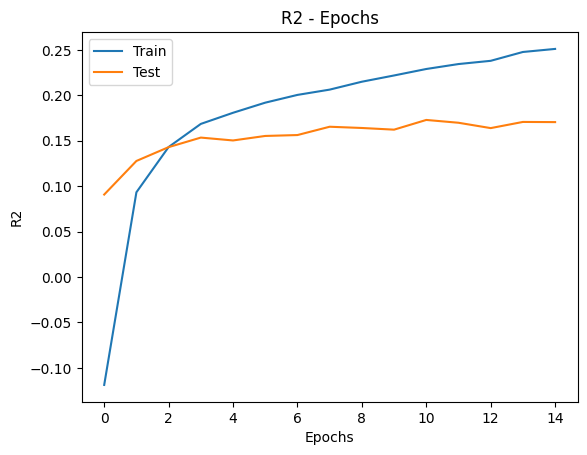

In [ ]:
plt.plot(mean_r2_train, label='Train')
plt.plot(mean_r2_test, label='Test')
plt.title('R2 - Epochs')
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.legend()
plt.show()

print('\n\n')